In [81]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

In [82]:
#### to find whether the image has low contrast or high contrast ###

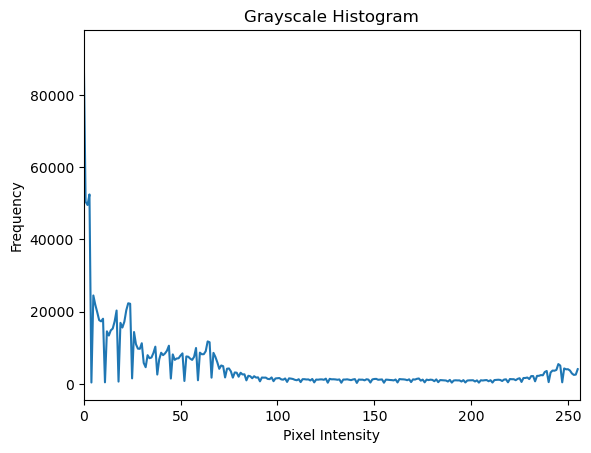

The image has high contrast.


In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def check_contrast_histogram(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    # Plot the histogram
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()
    
    # Evaluate contrast
    std_dev = np.std(image)
    if std_dev > 50:
        print("The image has high contrast.")
    else:
        print("The image has low contrast.")



check_contrast_histogram("woman.webp")



In [84]:
### make watermark and hide it in woman image ###

In [85]:
from PIL import Image, ImageDraw, ImageFont, ImageEnhance

# Open the original image
image = Image.open("woman.webp").convert("RGBA")

# Create a transparent layer the same size as the original image
txt_layer = Image.new("RGBA", image.size, (255, 255, 255, 0))

draw = ImageDraw.Draw(txt_layer)

# Define the text and font
text = "Hidden text"
font = ImageFont.truetype("arial.ttf", 20)

x = 35
y = 580

# Add the text to the transparent layer with lower opacity (alpha value)
draw.text((x, y), text, font=font, fill=(100, 100, 100, 20))  # Lower alpha means more transparent

# Combine the original image with the transparent watermark layer
watermarked = Image.alpha_composite(image, txt_layer)

# Convert back to RGB if needed and save the result
watermarked = watermarked.convert("RGB")
watermarked.save("output1.jpg")

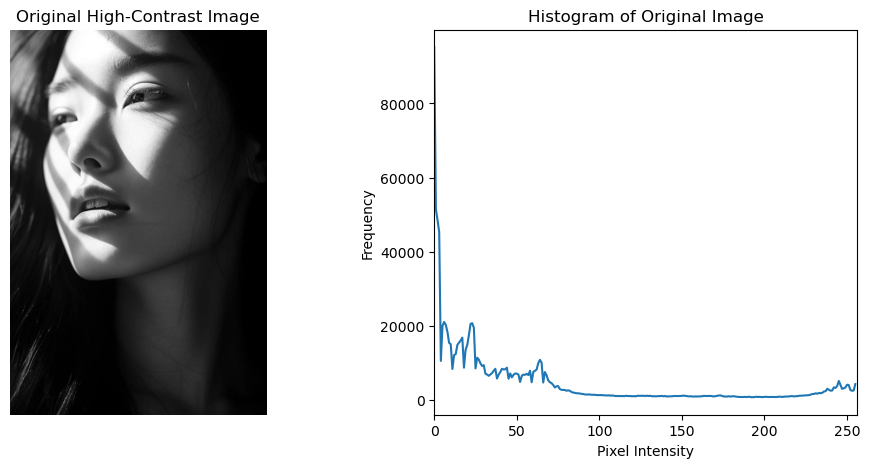

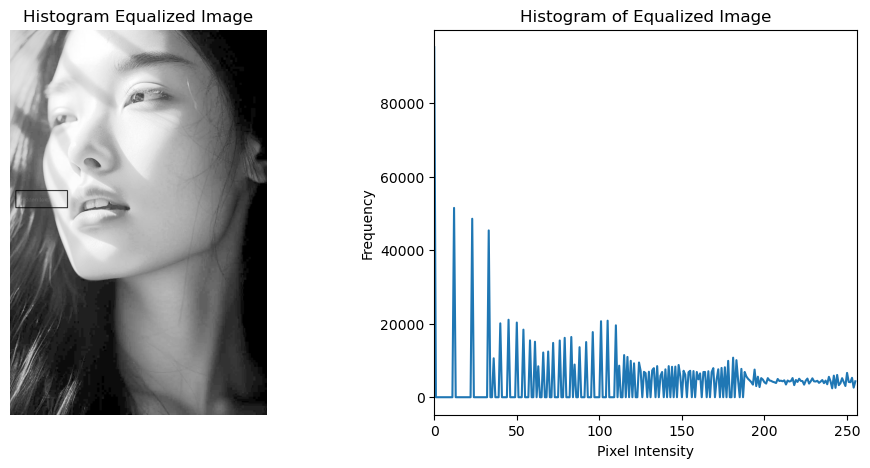

In [86]:
high_contrast_image = cv2.imread('output1.jpg',cv2.IMREAD_GRAYSCALE)
def plot_histogram(image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

# Display the original image and histogram
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.imshow(low_contrast_image, cmap='gray')
plt.title('Original High-Contrast Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plot_histogram(low_contrast_image, 'Histogram of Original Image')
plt.show()

# Step 4: Apply Histogram Equalization
equalized_image = cv2.equalizeHist(high_contrast_image)

# Step 5: Show the equalized image and its histogram
plt.figure(figsize=(12, 5))


### to show where the hidden text is ###
### also you can see the result better as output2 in the same root###
equalized_image_rec = equalized_image.copy()
top_left = (20,560)
bottom_right = (200, 620 )
cv2.rectangle(equalized_image_rec, top_left, bottom_right, (0,255,0),2)

plt.subplot(1, 2, 1)
plt.imshow(equalized_image_rec, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')





plt.subplot(1, 2, 2)
plot_histogram(equalized_image, 'Histogram of Equalized Image')
cv2.imwrite('output2.jpg', equalized_image)
plt.show()

In [87]:
#### question2

### for compressing the image, I use bit plane, png formatting and reducing image resolution with resizing(interpolation)###


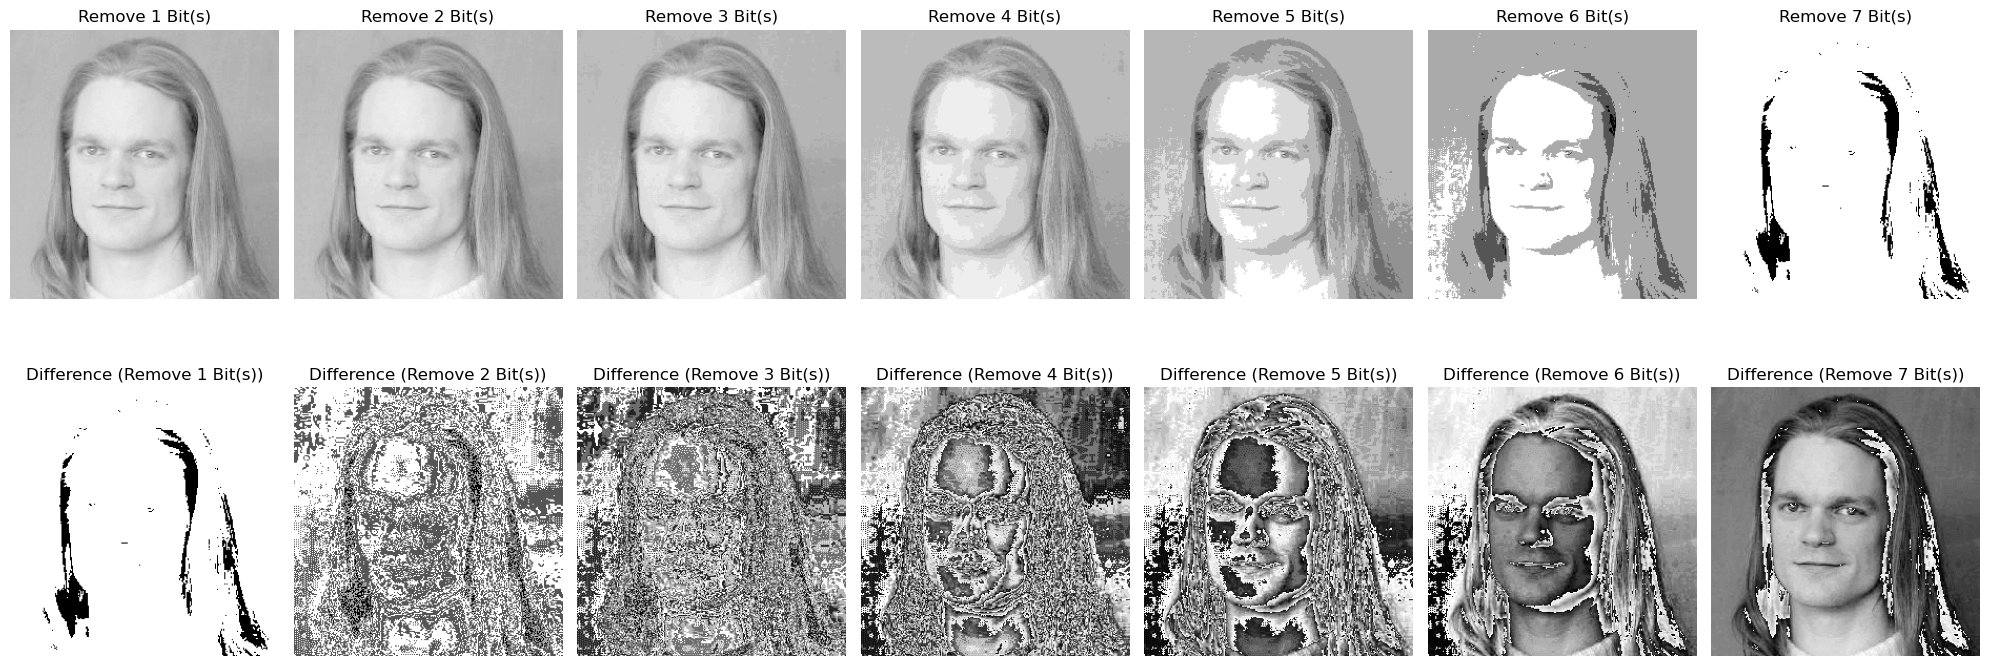

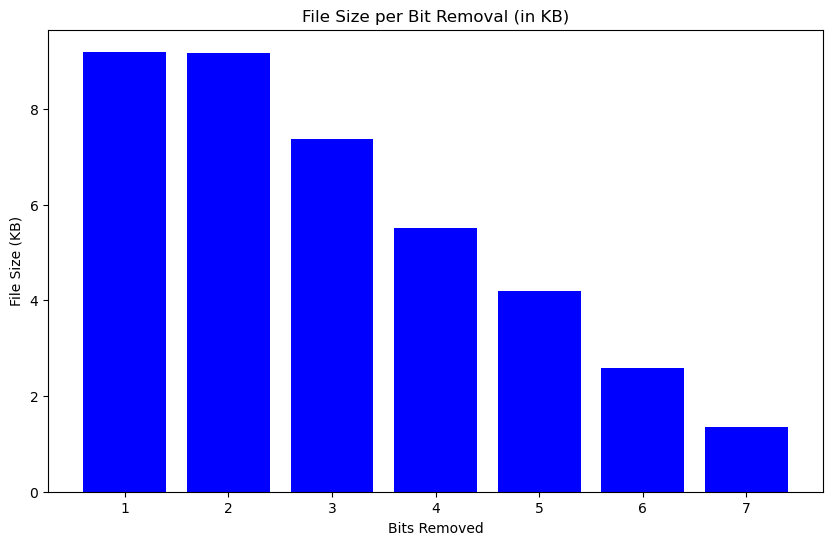

In [88]:
import os
import matplotlib.pyplot as plt
# Load a grayscale image
image = cv2.imread('man.png', cv2.IMREAD_GRAYSCALE)
# Create a figure with two rows: one for the compressed images and one for the differences
fig, axs = plt.subplots(2, 7, figsize=(20, 8))

file_sizes = []

# Loop over the number of bits to remove
for i in range(1, 8):
    # Create the bit mask by keeping only the upper bits and zeroing out the lower bits
    bit_mask = 0xFF & (0xFF << i)  # Keeps the top (8 - i) bits and removes the lower bits

    
    # Apply the mask using bitwise AND operation
    compressed_image = cv2.bitwise_and(image, bit_mask)
    compressed_image_path = f"bit_plane_{i}.png"
    
    # Resize the image to half of its original size
    height, width = compressed_image.shape
    resized_image = cv2.resize(compressed_image, (width // 2, height // 2), interpolation=cv2.INTER_AREA)
    
    cv2.imwrite(compressed_image_path, resized_image,[cv2.IMWRITE_PNG_COMPRESSION, 9])
    # Calculate the difference between the original and compressed images
    difference_image = cv2.absdiff(image, compressed_image)
    
    # Calculate the file size of the compressed image
    file_size = os.path.getsize(compressed_image_path) / 1024  # Convert to KB
    file_sizes.append(file_size)

    # Display the compressed image in the first row
    axs[0, i-1].imshow(compressed_image, cmap='gray')
    axs[0, i-1].set_title(f'Remove {i} Bit(s)')
    axs[0, i-1].axis('off')

    # Display the difference image in the second row
    axs[1, i-1].imshow(difference_image, cmap='gray')
    axs[1, i-1].set_title(f'Difference (Remove {i} Bit(s))')
    axs[1, i-1].axis('off')
    
    

# Display the figure
plt.tight_layout()
plt.show()



# Create a new figure for the file sizes bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, 8), file_sizes, color='blue')
plt.title('File Size per Bit Removal (in KB)')
plt.xlabel('Bits Removed')
plt.ylabel('File Size (KB)')
plt.xticks(range(1, 8))
plt.show()


